In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = pd.read_csv('credit.csv')

In [9]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

# Transform all object data types into integer data types

In [11]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes # codes will give the Integer representation of the Cateorical Type                                                                              

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

# Seperate the data into dependent and independent variables

In [13]:
x = df.drop('default', axis=1)
y = df.pop('default')

# Split the data into Testing and Training

## Cart Model - Version 1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, train_labels, test_lables = train_test_split(x, y, test_size=.30, random_state=1) # Test set size proportion is 30%

In [16]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [17]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [18]:
from sklearn import tree

In [19]:
train_char_label = ['No', 'Yes']

In [20]:
credit_tree_file = open('c:\credit_tree.dot', 'w')

In [21]:
dot_data = tree.export_graphviz(dt_model, out_file=credit_tree_file, feature_names=list(x_train), class_names=train_char_label)

In [22]:
credit_tree_file.close()

## Cart Model Version 2

In [23]:
# min_samples_leaf - Every leaf observation has 10 samples in it. (After split)
# min_samples_split - For a node to be split, it should have 30 observations in it. (Before split)
# mins_samples_leaf = 3 * min_samples_split

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [24]:
reg_dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [25]:
credit_tree_regularized = open('c:\credit_tree_regularized.dot', 'a')

dot_data = tree.export_graphviz(reg_dt_model, out_file=credit_tree_regularized, feature_names=list(x_train), class_names=train_char_label)

credit_tree_regularized.close()

# Check How to Predict for the Test Data

## Understand model's feature importances

It's a measure of Gini Gain Contribution made by every variable, you can use to remove some not important variables

In [26]:
reg_dt_model.feature_importances_

array([0.39825712, 0.14608975, 0.09986185, 0.06438364, 0.09635413,
       0.07521616, 0.03116225, 0.02941814, 0.        , 0.00909944,
       0.02221617, 0.        , 0.01221686, 0.01572449, 0.        ,
       0.        ])

In [28]:
print(pd.DataFrame(dt_model.feature_importances_, columns=['Imp'], index=x_train.columns))

                           Imp
checking_balance      0.139521
months_loan_duration  0.083650
credit_history        0.068862
purpose               0.062547
amount                0.182092
savings_balance       0.067363
employment_duration   0.072014
percent_of_income     0.035592
years_at_residence    0.038772
age                   0.153625
other_credit          0.017890
housing               0.007973
existing_loans_count  0.017788
job                   0.023460
dependents            0.017836
phone                 0.011017


In [29]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns=['Imp'], index=x_train.columns))

                           Imp
checking_balance      0.398257
months_loan_duration  0.146090
credit_history        0.099862
purpose               0.064384
amount                0.096354
savings_balance       0.075216
employment_duration   0.031162
percent_of_income     0.029418
years_at_residence    0.000000
age                   0.009099
other_credit          0.022216
housing               0.000000
existing_loans_count  0.012217
job                   0.015724
dependents            0.000000
phone                 0.000000


## Prediction

In [30]:
# Get the predictions for train and test data

ytrain_predict = reg_dt_model.predict(x_train);
ytest_predict = reg_dt_model.predict(x_test);

In [31]:
# Get the proportions/probability for the train and test data

ytrain_predict_proba = reg_dt_model.predict_proba(x_train);
ytest_predict_proba = reg_dt_model.predict_proba(x_test);

In [32]:
print(ytrain_predict, ytrain_predict_proba)
print(ytest_predict, ytest_predict_proba)

[1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 

# CART - Model performance measure hands on

### Build an ROC Curve

In [33]:
import matplotlib.pyplot as plt

In [34]:
probs = reg_dt_model.predict_proba(x_train)

In [35]:
probs = probs[:, 1]

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
auc = roc_auc_score(train_labels, probs)

In [38]:
auc

0.8510586131302642

In [48]:
probs_test = reg_dt_model.predict_proba(x_test)[:, 1]

In [49]:
auc_test = roc_auc_score(test_lables, probs_test)
auc_test

0.724788089545751

In [44]:
from sklearn.metrics import roc_curve

In [45]:
fpr, tpr, thresholds = roc_curve(train_labels, probs)

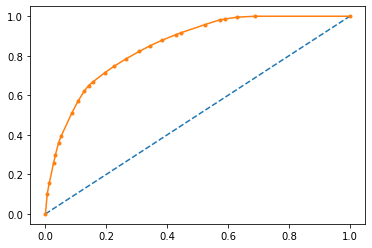

In [46]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

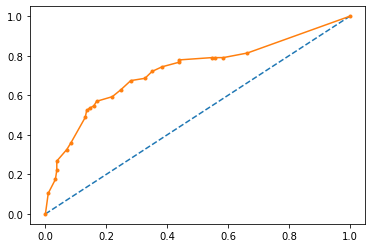

In [51]:
fpr, tpr, thresholds = roc_curve(test_lables, probs_test)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Create Classification Report and Confusion Matrix

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       486
           1       0.68      0.62      0.65       214

    accuracy                           0.80       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.79      0.80      0.79       700



In [57]:
print(classification_report(test_lables, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [58]:
confusion_matrix(train_labels, ytrain_predict)

array([[424,  62],
       [ 81, 133]], dtype=int64)

In [59]:
confusion_matrix(test_lables, ytest_predict)

array([[183,  31],
       [ 40,  46]], dtype=int64)

### Compute Accuracy

In [60]:
reg_dt_model.score(x_train, train_labels)

0.7957142857142857

In [61]:
reg_dt_model.score(x_test, test_lables)

0.7633333333333333